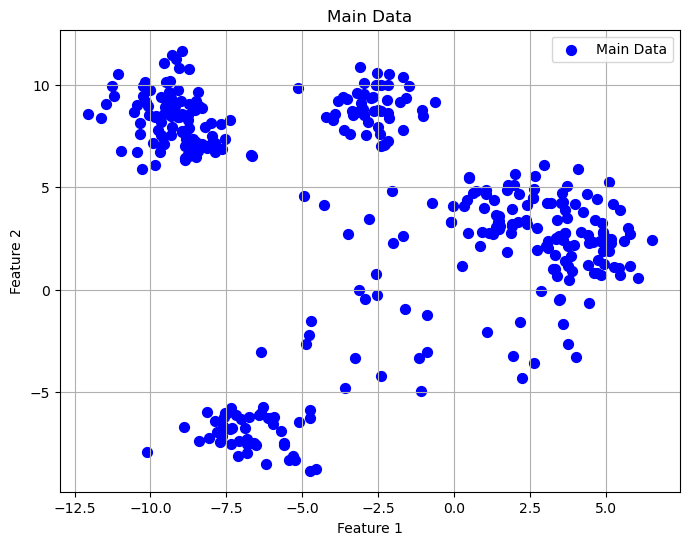


Top-Down (Agglomerative Clustering) with Different Distance Functions:
Linkage: complete
Silhouette Score (Distance Function: Manhattan with complete linkage) for Agglomerative: 0.5948


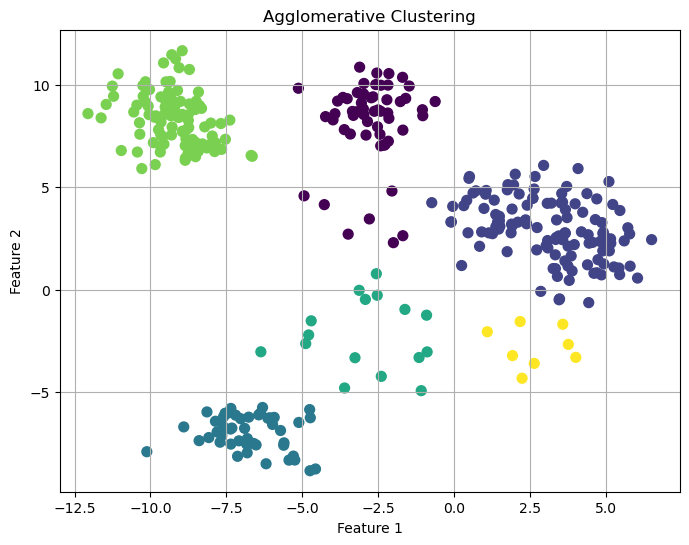

Linkage: average
Silhouette Score (Distance Function: Manhattan with average linkage) for Agglomerative: 0.5829


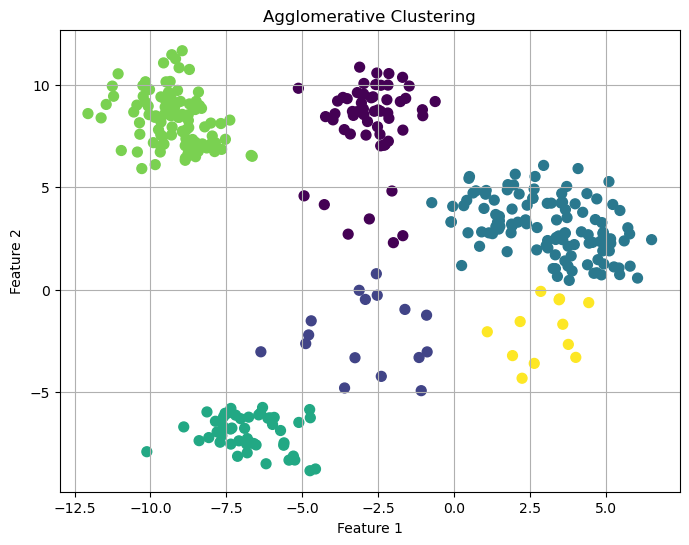


DBSCAN with Different Distance Functions:
Distance Function: euclidean
Silhouette Score (Distance Function: euclidean) for DBSCAN: 0.5663


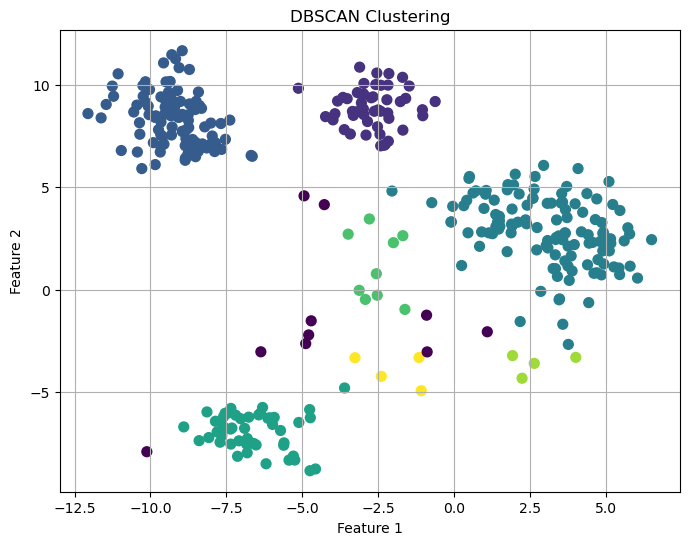

Distance Function: manhattan
Silhouette Score (Distance Function: manhattan) for DBSCAN: 0.5899


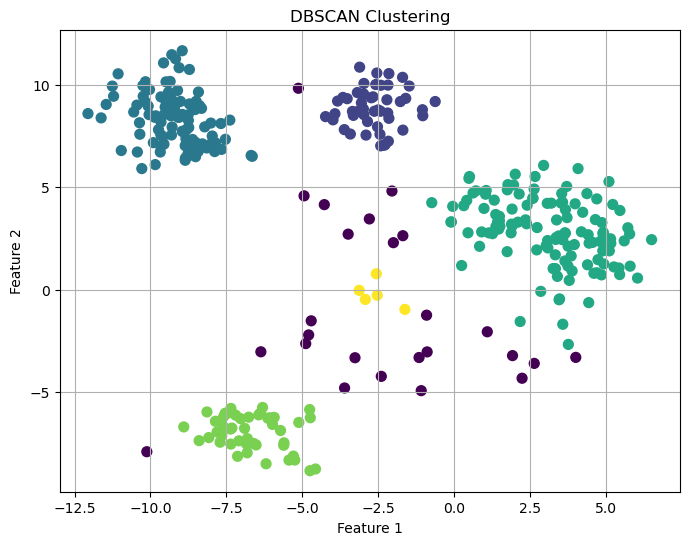


K-Means with Different Distance Functions:
Distance Function: euclidean
Silhouette Score (Distance Function: euclidean) for K-Means: 0.5812


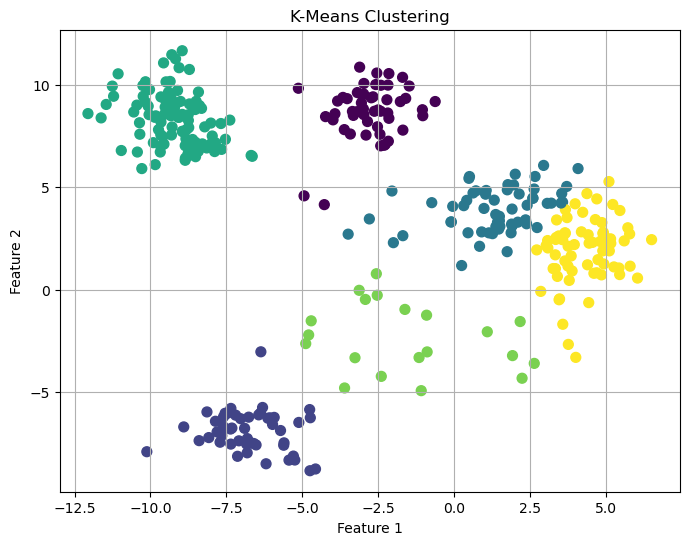

Distance Function: manhattan
Silhouette Score (Distance Function: manhattan) for K-Means: 0.5812


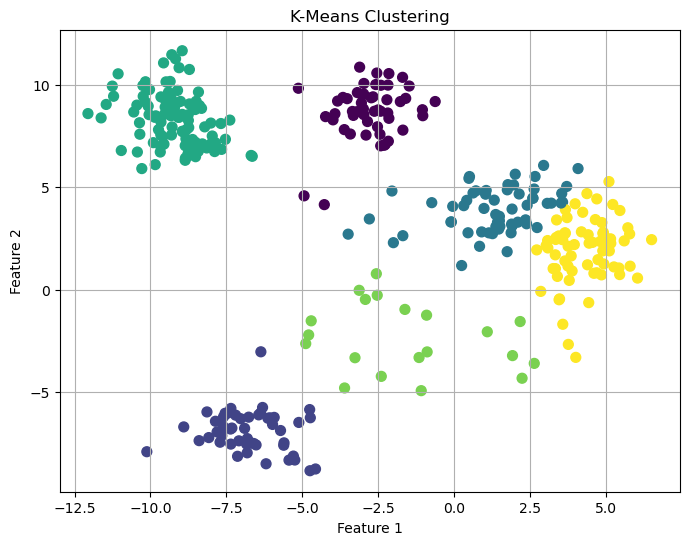

Distance Function: cosine
Silhouette Score (Distance Function: cosine) for K-Means: 0.5812


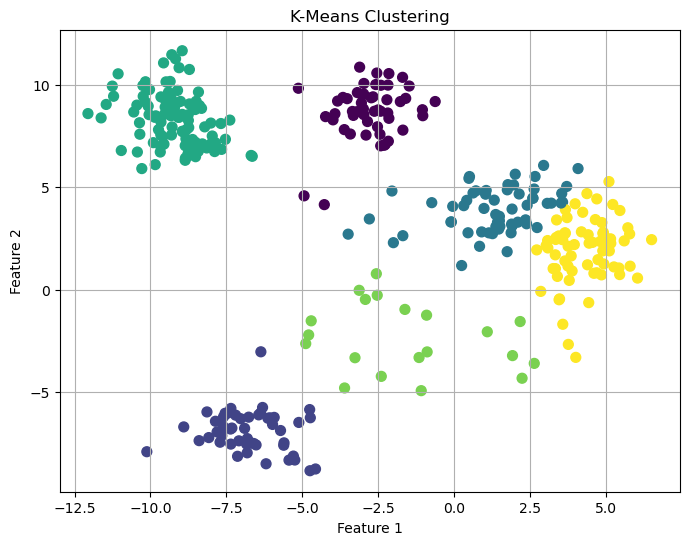

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Generate synthetic data with 6 blobs for clustering comparison
data, true_labels = make_blobs(n_samples=300, centers=6, cluster_std=1.0, random_state=42)

# Add some noise to the data
noise = np.random.uniform(low=-5, high=5, size=(50, 2))
data = np.vstack([data, noise])

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Visualize the main data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='blue', s=50, label='Main Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Main Data')
plt.legend()
plt.grid(True)
plt.show()

# Helper function to evaluate clustering with different distance functions and visualize the results
def evaluate_clustering(clustering_model, distance_function, method_name):
    clustering_labels = clustering_model.fit_predict(data_normalized)
    silhouette_avg = silhouette_score(data_normalized, clustering_labels)
    print(f"Silhouette Score (Distance Function: {distance_function}) for {method_name}: {silhouette_avg:.4f}")

    # Visualize the clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=clustering_labels, s=50, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{method_name} Clustering')
    plt.grid(True)
    plt.show()

# Compute affinity matrix using nearest neighbors graph
def compute_affinity(data, n_neighbors, gamma):
    connectivity = kneighbors_graph(data, n_neighbors=n_neighbors, mode='connectivity')
    affinity_matrix = np.exp(-gamma * connectivity.toarray())
    return affinity_matrix

# Compare clustering methods using different distance functions
def main():
    # Hierarchical Clustering (Top-Down) with "complete" or "average" linkage
    print("\nTop-Down (Agglomerative Clustering) with Different Distance Functions:")
    for linkage in ['complete', 'average']:
        print(f"Linkage: {linkage}")
        hierarchical_clustering = AgglomerativeClustering(n_clusters=6, metric='manhattan', linkage=linkage)
        evaluate_clustering(hierarchical_clustering, f"Manhattan with {linkage} linkage", 'Agglomerative')

    # DBSCAN
    print("\nDBSCAN with Different Distance Functions:")
    for distance in ['euclidean', 'manhattan']:
        print(f"Distance Function: {distance}")
        dbscan_clustering = DBSCAN(eps=0.3, min_samples=5, metric=distance)
        evaluate_clustering(dbscan_clustering, distance, 'DBSCAN')

    # K-Means
    print("\nK-Means with Different Distance Functions:")
    for distance in ['euclidean', 'manhattan', 'cosine']:
        print(f"Distance Function: {distance}")
        kmeans_clustering = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=42)
        evaluate_clustering(kmeans_clustering, distance, 'K-Means')

if __name__ == "__main__":
    main()
